In [1]:
# Import libraries
import math
import pandas_datareader as web
import  numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM

import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')
import numpy as np
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [1]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [85]:
# Description: This program predicts the price of Bitcoin for the next 30 days


In [2]:

import pandas_datareader.data as web
import datetime    
start = datetime.datetime(2012, 1, 3)
end = datetime.datetime(2021, 4, 15)
df = web.DataReader("AAPL", 'yahoo', start, end)

dates =[]
for x in range(len(df)):
    newdate = str(df.index[x])
    newdate = newdate[0:10]
    dates.append(newdate)

df['date'] = dates


RemoteDataError: Unable to read URL: https://finance.yahoo.com/quote/AAPL/history?period1=1325556000&period2=1618538399&interval=1d&frequency=1d&filter=history
Response Text:
b'<!DOCTYPE html>\n  <html lang="en-us"><head>\n  <meta http-equiv="content-type" content="text/html; charset=UTF-8">\n      <meta charset="utf-8">\n      <title>Yahoo</title>\n      <meta name="viewport" content="width=device-width,initial-scale=1,minimal-ui">\n      <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n      <style>\n  html {\n      height: 100%;\n  }\n  body {\n      background: #fafafc url(https://s.yimg.com/nn/img/sad-panda-201402200631.png) 50% 50%;\n      background-size: cover;\n      height: 100%;\n      text-align: center;\n      font: 300 18px "helvetica neue", helvetica, verdana, tahoma, arial, sans-serif;\n  }\n  table {\n      height: 100%;\n      width: 100%;\n      table-layout: fixed;\n      border-collapse: collapse;\n      border-spacing: 0;\n      border: none;\n  }\n  h1 {\n      font-size: 42px;\n      font-weight: 400;\n      color: #400090;\n  }\n  p {\n      color: #1A1A1A;\n  }\n  #message-1 {\n      font-weight: bold;\n      margin: 0;\n  }\n  #message-2 {\n      display: inline-block;\n      *display: inline;\n      zoom: 1;\n      max-width: 17em;\n      _width: 17em;\n  }\n      </style>\n  <script>\n    document.write(\'<img src="//geo.yahoo.com/b?s=1197757129&t=\'+new Date().getTime()+\'&src=aws&err_url=\'+encodeURIComponent(document.URL)+\'&err=%<pssc>&test=\'+encodeURIComponent(\'%<{Bucket}cqh[:200]>\')+\'" width="0px" height="0px"/>\');var beacon = new Image();beacon.src="//bcn.fp.yahoo.com/p?s=1197757129&t="+new Date().getTime()+"&src=aws&err_url="+encodeURIComponent(document.URL)+"&err=%<pssc>&test="+encodeURIComponent(\'%<{Bucket}cqh[:200]>\');\n  </script>\n  </head>\n  <body>\n  <!-- status code : 404 -->\n  <!-- Not Found on Server -->\n  <table>\n  <tbody><tr>\n      <td>\n      <img src="https://s.yimg.com/rz/p/yahoo_frontpage_en-US_s_f_p_205x58_frontpage.png" alt="Yahoo Logo">\n      <h1 style="margin-top:20px;">Will be right back...</h1>\n      <p id="message-1">Thank you for your patience.</p>\n      <p id="message-2">Our engineers are working quickly to resolve the issue.</p>\n      </td>\n  </tr>\n  </tbody></table>\n  </body></html>'

In [ ]:
df.reset_index(inplace=True,drop=False)

In [5]:
df['Date']

0      2012-01-03
1      2012-01-04
2      2012-01-05
3      2012-01-06
4      2012-01-09
          ...    
2331   2021-04-09
2332   2021-04-12
2333   2021-04-13
2334   2021-04-14
2335   2021-04-15
Name: Date, Length: 2336, dtype: datetime64[ns]

In [ ]:
df



In [ ]:
df.head(7)



In [8]:
#Separate dates for future plotting
train_dates = pd.to_datetime(df['Date'])




In [905]:
#Variables for training
# cols = list(df)[0:1]


In [9]:
#Variables for training
cols = list(df)[1:6]

In [10]:
cols

['High', 'Low', 'Open', 'Close', 'Volume']

In [11]:
df_for_training = df[cols].astype(float)

<AxesSubplot:>

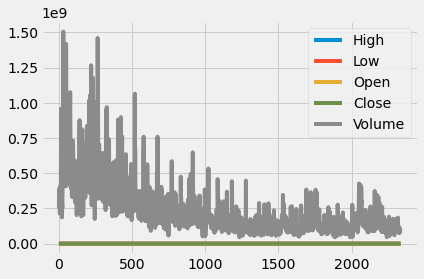

In [12]:
df_for_plot=df_for_training.tail(5000)
df_for_plot.plot.line()

In [13]:
#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)

df_for_training_scaled = scaler.transform(df_for_training)



In [14]:
#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 2. We will make timesteps = 3. 
#With this, the resultant n_samples is 5 (as the input data has 9 rows).

trainX = []
trainY = []

In [15]:
n_future = 1 # Number of days we want to predict into the future
n_past = 150 # Number of past days we want to use to predict the future


for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))


trainX shape == (2186, 150, 5).
trainY shape == (2186, 1).


In [16]:
# define Autoencoder model

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150, 64)           17920     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 30,369
Trainable params: 30,369
Non-trainable params: 0
_________________________________________________________________


In [17]:
# fit model
history = model.fit(trainX, trainY, epochs=10, batch_size=16, validation_split=0.1, verbose=1)



Epoch 1/10
123/123 [==============================] - 19s 124ms/step - loss: 0.0787 - val_loss: 1.8696
Epoch 2/10
123/123 [==============================] - 15s 119ms/step - loss: 0.0131 - val_loss: 1.7064
Epoch 3/10
123/123 [==============================] - 15s 118ms/step - loss: 0.0103 - val_loss: 0.8348
Epoch 4/10
123/123 [==============================] - 15s 119ms/step - loss: 0.0108 - val_loss: 0.7595
Epoch 5/10
123/123 [==============================] - 14s 117ms/step - loss: 0.0105 - val_loss: 0.1392
Epoch 6/10
123/123 [==============================] - 14s 117ms/step - loss: 0.0102 - val_loss: 0.0412
Epoch 7/10
123/123 [==============================] - 15s 118ms/step - loss: 0.0101 - val_loss: 0.0202
Epoch 8/10
123/123 [==============================] - 15s 121ms/step - loss: 0.0086 - val_loss: 0.0220
Epoch 9/10
123/123 [==============================] - 15s 122ms/step - loss: 0.0085 - val_loss: 0.2274
Epoch 10/10
123/123 [==============================] - 14s 117ms/step - l

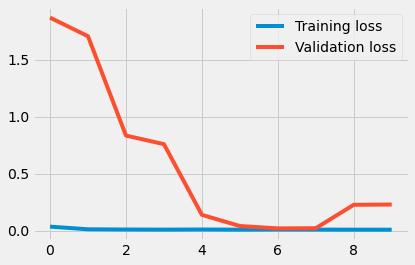

In [18]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [47]:
#Forecasting...
#Start with the last day in training date and predict future...
n_future= 150 #Redefining n_future to extend prediction dates beyond original n_future dates...
forecast_period_dates = pd.date_range(list(train_dates)[-1], periods=n_future, freq='1d').tolist()

forecast = model.predict(trainX[-n_future:]) #forecast 

In [48]:
#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]


In [49]:
# Convert timestamp to date
forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Close':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


<ipython-input-65-36b5c3f76479>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])
/home/thembajsph/Downloads/anaconda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/thembajsph/Downloads/anaconda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit ke

<AxesSubplot:xlabel='Date', ylabel='Close'>

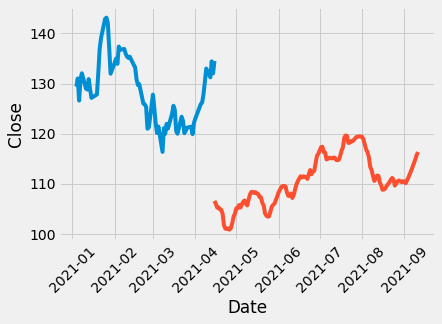

In [65]:
original = df[['Date', 'Close']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2021-1-1']
plt.xticks(rotation=45)

sns.lineplot(original['Date'], original['Close'])
sns.lineplot(df_forecast['Date'], df_forecast['Close'])

In [64]:
df_forecast.head(32)


,Date,Close,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
0,2021-04-15,106.591179,0.000000,0.000000,NaN,NaN
1,2021-04-16,106.037064,-0.044203,-0.008841,NaN,106.037064
2,2021-04-17,105.254440,-0.140763,-0.035225,NaN,NaN
3,2021-04-18,105.278450,-0.212895,-0.070759,NaN,NaN
4,2021-04-19,104.912056,-0.296211,-0.115850,NaN,NaN
5,2021-04-20,104.812401,-0.366062,-0.165892,NaN,NaN
6,2021-04-21,103.970505,-0.483776,-0.229469,NaN,NaN
7,2021-04-22,101.654312,-0.755256,-0.334626,NaN,NaN
8,2021-04-23,101.037506,-1.008552,-0.469411,NaN,NaN
9,2021-04-24,100.974312,-1.200550,-0.615639,NaN,NaN


In [52]:
#Description: This program uses the Moving Average Convergence/Divergence (MACD) crossover
#             to determine when to buy and sell stock.


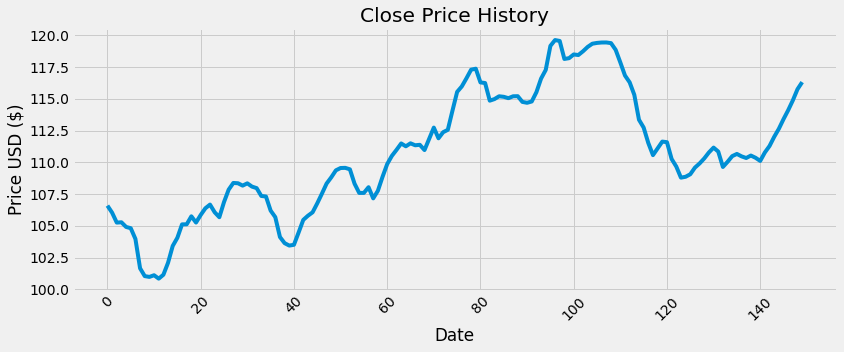

In [53]:
#Visually show the stock price 
plt.figure(figsize=(12.2, 4.5))
plt.plot(df_forecast['Close'], label='Close')
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.show()

In [54]:
#Calculate the MACF and signal line indicators
#Calculate the short term exponetial moving average (EMA)
ShortEMA = df_forecast.Close.ewm(span=12, adjust=False).mean()

#Calculate the long term exponetial moving average (EMA)
LongEMA = df_forecast.Close.ewm(span=26, adjust=False).mean()
#Calculate the MACD line
MACD = ShortEMA - LongEMA
#Calculate the signal line
signal = MACD.ewm(span=9, adjust=False).mean()



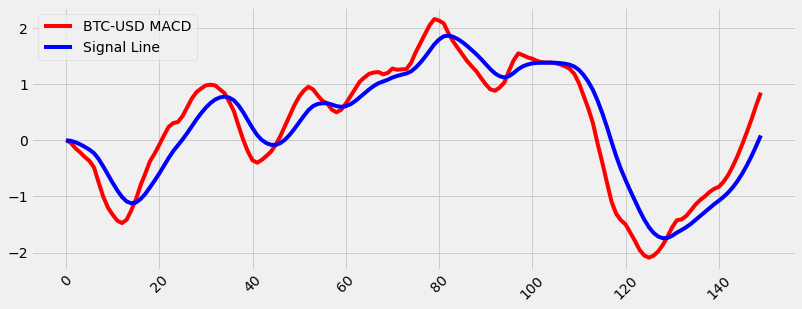

In [55]:
#plot the chart
plt.figure(figsize=(12.2, 4.5))
plt.plot(df_forecast.index, MACD, label = 'BTC-USD MACD', color= 'red')
plt.plot(df_forecast.index, signal, label= 'Signal Line', color= 'blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [56]:
#Create  new columns for the data
df_forecast['MACD'] = MACD
df_forecast['Signal Line'] = signal
#Show the data
df_forecast


,Date,Close,MACD,Signal Line
0,2021-04-15,106.591179,0.000000,0.000000
1,2021-04-16,106.037064,-0.044203,-0.008841
2,2021-04-17,105.254440,-0.140763,-0.035225
3,2021-04-18,105.278450,-0.212895,-0.070759
4,2021-04-19,104.912056,-0.296211,-0.115850
...,...,...,...,...
145,2021-09-07,113.407890,-0.076099,-0.595744
146,2021-09-08,114.111023,0.141324,-0.448331
147,2021-09-09,114.887733,0.372018,-0.284261
148,2021-09-10,115.767334,0.618690,-0.103671


In [57]:
#Create a funcction to signal when to buy and sell an asset
def buy_sell(signal):
    Buy = []
    Sell = []
    flag = -1
    
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:
            Sell.append(np.nan)
            if flag != 1:
                Buy.append(signal['Close'][i])
                flag = 1
            else:
                Buy.append(np.nan)
        elif signal['MACD'][i] < signal['Signal Line'][i]:
            Buy.append(np.nan)
            if flag != 0:
                Sell.append(signal['Close'][i])
                flag = 0
            else:
                Sell.append(np.nan)
        else:
            Buy.append(np.nan)
            Sell.append(np.nan)
            
    return (Buy, Sell)
                
                

In [58]:
#Create buy and sell column
a = buy_sell(df_forecast)
df_forecast['Buy_Signal_Price'] = a[0]
df_forecast['Sell_Signal_Price'] = a[1]

In [59]:
#Show the data
df_forecast


,Date,Close,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
0,2021-04-15,106.591179,0.000000,0.000000,NaN,NaN
1,2021-04-16,106.037064,-0.044203,-0.008841,NaN,106.037064
2,2021-04-17,105.254440,-0.140763,-0.035225,NaN,NaN
3,2021-04-18,105.278450,-0.212895,-0.070759,NaN,NaN
4,2021-04-19,104.912056,-0.296211,-0.115850,NaN,NaN
...,...,...,...,...,...,...
145,2021-09-07,113.407890,-0.076099,-0.595744,NaN,NaN
146,2021-09-08,114.111023,0.141324,-0.448331,NaN,NaN
147,2021-09-09,114.887733,0.372018,-0.284261,NaN,NaN
148,2021-09-10,115.767334,0.618690,-0.103671,NaN,NaN


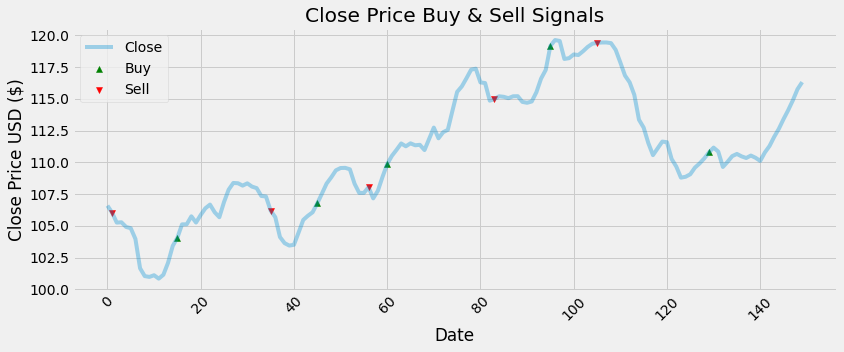

In [60]:
#Visually show the stock buy and sell signal
plt.figure(figsize=(12.2, 4.5))
plt.scatter(df_forecast.index, df_forecast['Buy_Signal_Price'], color= 'green', label='Buy', marker='^',alpha=1)
plt.scatter(df_forecast.index, df_forecast['Sell_Signal_Price'], color= 'red', label='Sell', marker='v',alpha=1)
plt.plot(df_forecast['Close'], label='Close', alpha = 0.35)
plt.xticks(rotation=45)
plt.title('Close Price Buy & Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc = 'upper left')
plt.show()